# Time series forecasting with sktime
Estimated time: 40 min

## Introduction

What is a time series and what can we forecast?

![](../images/ts_quiz.png)

Factors that influence ”forecastability”:
1. How much data is available.
2. How similar the future is to the past.
3. How well we understand the factors that contribute to it.
4. Whether the forecasts can affect the thing we are trying to forecast.

## Quickstart

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

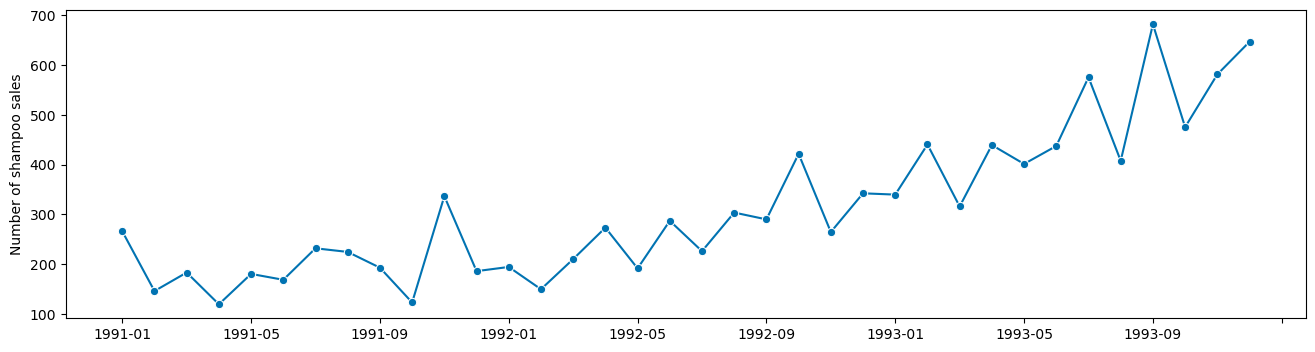

In [1]:
from sktime.datasets import load_shampoo_sales
from sktime.utils.plotting import plot_series

y = load_shampoo_sales()

plot_series(y)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

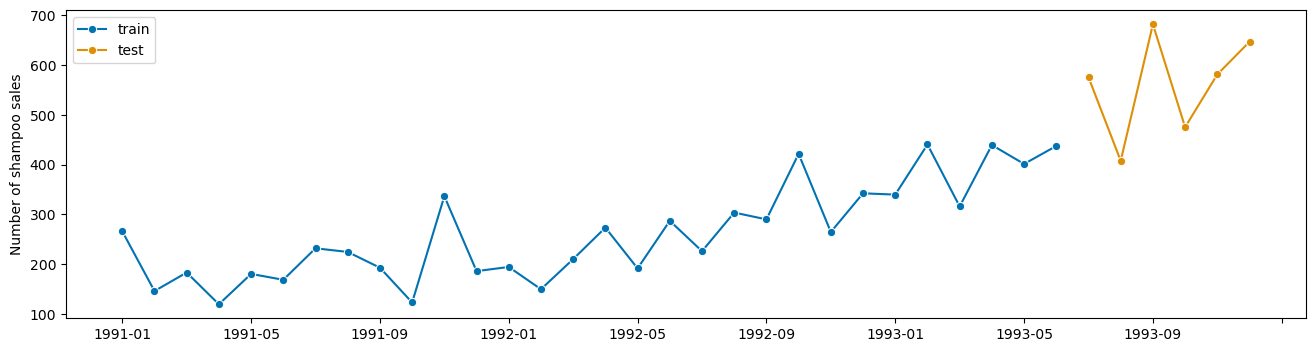

In [2]:
from sktime.forecasting.model_selection import temporal_train_test_split

y_train, y_test = temporal_train_test_split(y=y, test_size=6)
plot_series(y_train, y_test, labels=["train", "test"])

21:38:07 - cmdstanpy - INFO - Chain [1] start processing
21:38:08 - cmdstanpy - INFO - Chain [1] done processing


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

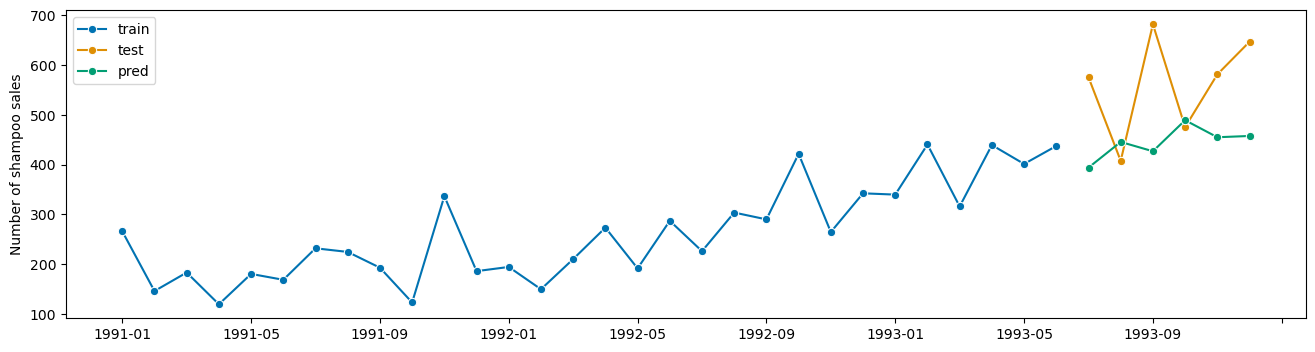

In [3]:
from sktime.forecasting.fbprophet import Prophet

# 1) Define the model
forecaster = Prophet()

# 2) Fit on train data
forecaster.fit(y_train)

# 3) Use fitted model to predict for a certain forecast horizon (fh)
fh = [1, 2, 3, 4, 5, 6]
y_pred = forecaster.predict(fh)

plot_series(y_train, y_test, y_pred, labels=["train", "test", "pred"])

In [4]:
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError

smape = MeanAbsolutePercentageError(symmetric=True)

print(f"Prophet - sMAPE error: {smape(y_test, y_pred):.1%}")

Prophet - sMAPE error: 25.7%


## Univariate forecasting

### Statistical (classical) forecasting methods

Let's try to improve our forecasting performance by using other stats-based method.

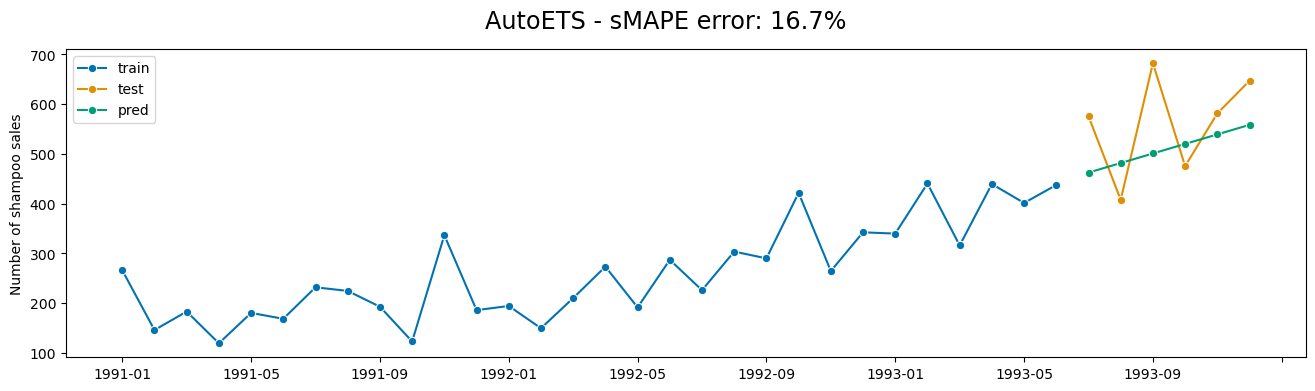

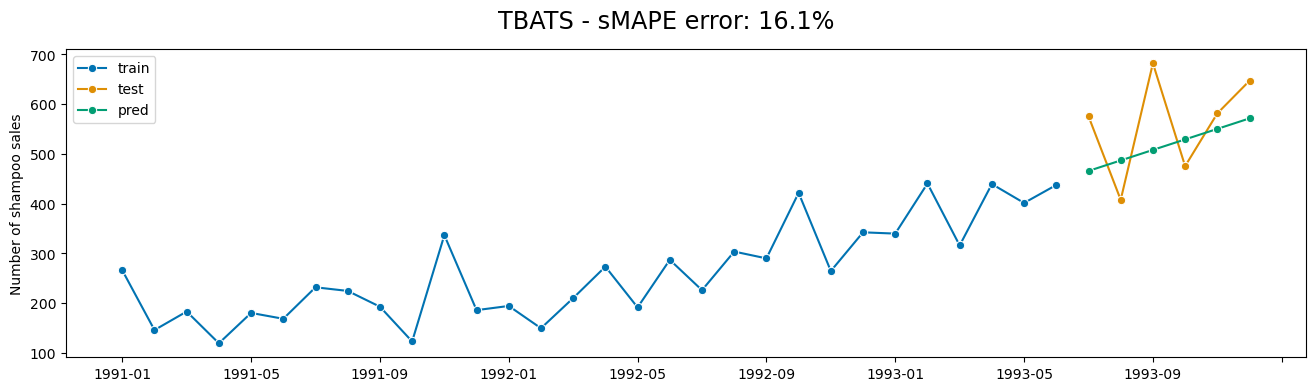

In [5]:
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.ets import AutoETS

forecasters = [AutoETS(auto=True), TBATS(sp=12)]

for forecaster in forecasters:
    y_pred = forecaster.fit_predict(y=y_train, fh=fh)
    title = (
        f"{str(forecaster).split('(')[0]} - sMAPE error: {smape(y_test, y_pred):.1%}"
    )
    plot_series(y_train, y_test, y_pred, labels=["train", "test", "pred"], title=title)

Check out all other sktime forecasting algorithms [here](https://www.sktime.net/en/latest/api_reference/forecasting.html) or by running the code below:

In [6]:
from sktime.registry import all_estimators

all_estimators("forecaster", as_dataframe=True)

/usr/local/Caskroom/miniforge/base/envs/pydata_sktime/lib/python3.9/site-packages/sktime/networks/inceptiontime.py:8: UserWarning: tensorflow
  _check_dl_dependencies("tensorflow", severity="warning")
/usr/local/Caskroom/miniforge/base/envs/pydata_sktime/lib/python3.9/site-packages/sktime/regression/deep_learning/cnn.py:15: UserWarning: tensorflow and tensorflow-probability are required for deep learning and probabilistic functionality in `sktime`. To install these dependencies, run: `pip install sktime[dl]`
  _check_dl_dependencies(severity="warning")


,name,estimator
0,ARDL,<class 'sktime.forecasting.ardl.ARDL'>
1,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
2,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
3,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
4,AutoEnsembleForecaster,<class 'sktime.forecasting.compose._ensemble.A...
5,BATS,<class 'sktime.forecasting.bats.BATS'>
6,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
7,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
8,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
9,Croston,<class 'sktime.forecasting.croston.Croston'>


### Forecasting with ML algorithms

We can use sklearn regressors (or a library like lightgbm) to forecast time series. 

But we need to transform our data into a tabular format first, with a table of features and a target columns.

![](../images/tabularization.png)

We can use autocorrelation and partial autocorrelation plots to help us select the window length for our tabularization.

(<Figure size 1200x800 with 3 Axes>,
 array([<Axes: ylabel='Number of shampoo sales'>,
        <Axes: title={'center': 'Autocorrelation'}>,
        <Axes: title={'center': 'Partial Autocorrelation'}>], dtype=object))

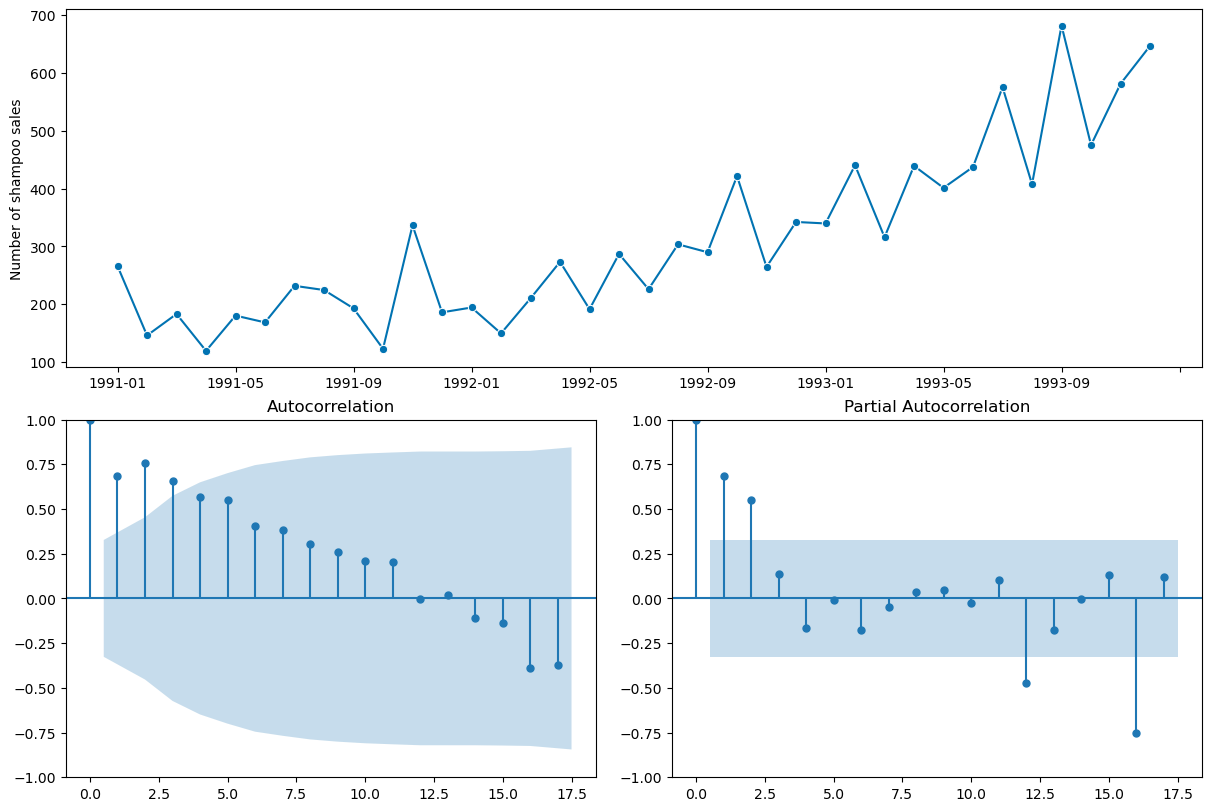

In [7]:
from sktime.utils.plotting import plot_correlations

plot_correlations(y, lags=17)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

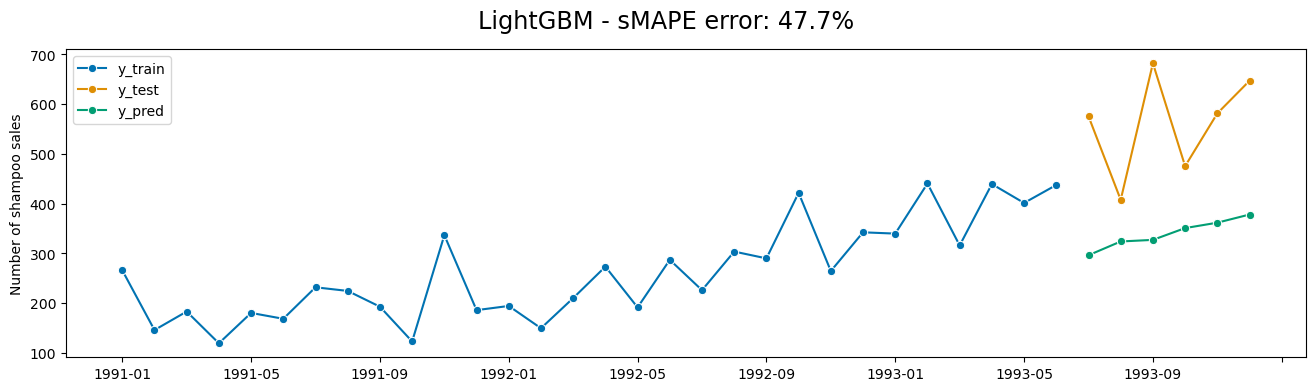

In [8]:
import lightgbm as lgb
from sktime.forecasting.compose import make_reduction

regressor = regressor = lgb.LGBMRegressor()
forecaster = make_reduction(regressor, strategy="direct", window_length=16)
y_pred = forecaster.fit_predict(y=y_train, fh=fh)
title = f"LightGBM - sMAPE error: {smape(y_test, y_pred):.1%}"
plot_series(
    y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], title=title
)

Why the bad performance? Gradient boosting trees cannot extrapolate, so hey will not forecast values they have not seen.

A simple way to address this is to apply a first-differencing transformation to the data before tabularization.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

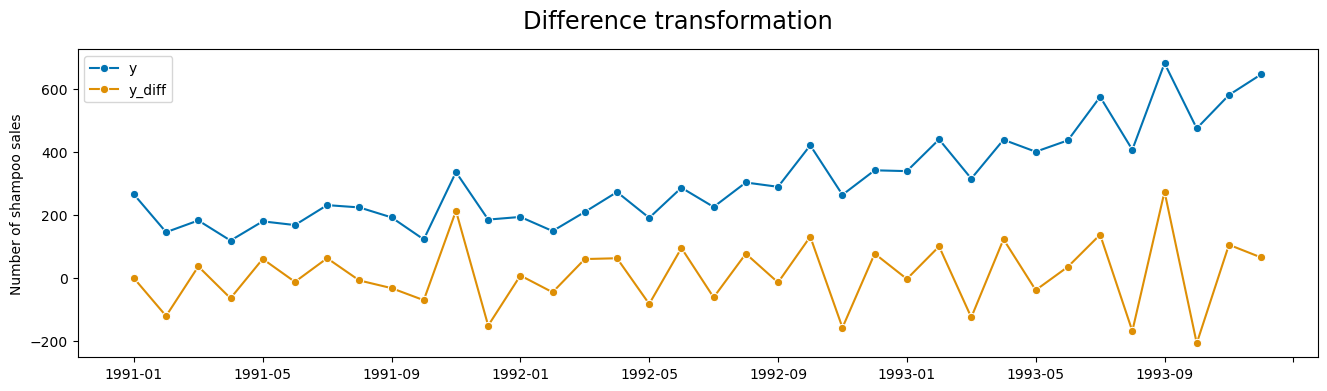

In [9]:
from sktime.transformations.series.difference import Differencer

transformer = Differencer(lags=1)
y_transform = transformer.fit_transform(y)
plot_series(y, y_transform, labels=["y", "y_diff"], title="Difference transformation")

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

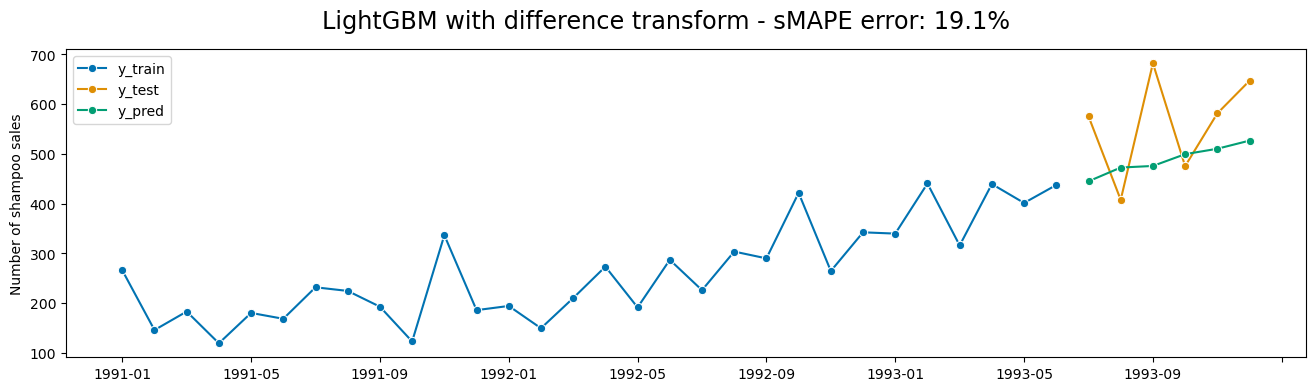

In [17]:
regressor = lgb.LGBMRegressor()
forecaster = make_reduction(regressor, strategy="direct", window_length=16)
forecaster_with_differencer = Differencer(lags=1) * forecaster
y_pred = forecaster_with_differencer.fit_predict(y=y_train, fh=fh)
title = f"LightGBM with difference transform - sMAPE error: {smape(y_test, y_pred):.1%}"
plot_series(
    y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"], title=title
)

More advanced content like composition and pipelines in `04_advanced.ipynb`.

### Model selection

#### Window splitters

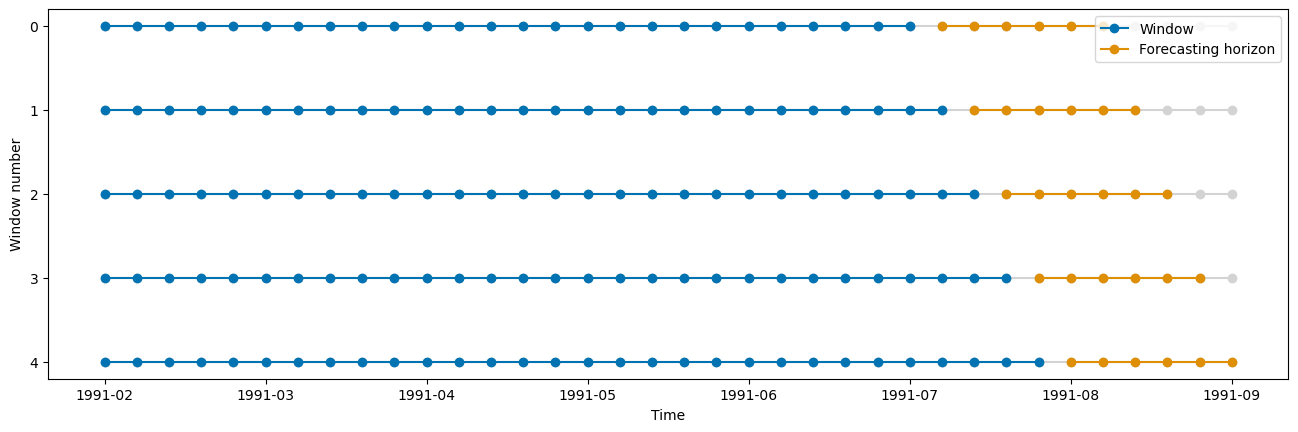

In [58]:
from sktime.forecasting.model_selection import ExpandingWindowSplitter
from sktime.utils.plotting import plot_windows

cv = ExpandingWindowSplitter(initial_window=26, fh=fh, step_length=1)
n_folds = cv.get_n_splits(y)
plot_windows(cv, y)

#### Backtesting

In [61]:
from sktime.forecasting.model_evaluation import evaluate
from sktime.performance_metrics.forecasting import MeanSquaredError

forecaster = forecaster_with_differencer.clone()
scorers = [smape, MeanSquaredError(square_root=True)]
backtest = evaluate(forecaster=forecaster, y=y, cv=cv, scoring=scorers, backend="dask", return_data=True)
backtest

,test_MeanAbsolutePercentageError,fit_time,pred_time,len_train_window,cutoff,y_train,y_test,y_pred,test_MeanSquaredError
0,0.197408,0.204061,0.039727,26,1993-02,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-03 315.9 1993-04 439.3 1993-05 4...,1993-03 443.719999 1993-04 489.759998 19...,94.580699
1,0.248172,0.190903,0.027657,27,1993-03,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-04 439.3 1993-05 401.3 1993-06 4...,1993-04 340.616665 1993-05 352.799997 19...,147.564917
2,0.157410,0.176494,0.014485,28,1993-04,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-05 401.3 1993-06 437.4 1993-07 5...,1993-05 438.042855 1993-06 459.599997 19...,97.546609
3,0.169100,0.186859,0.036138,29,1993-05,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-06 437.4 1993-07 575.5 1993-08 4...,1993-06 409.924999 1993-07 428.462498 19...,117.005752
4,0.190791,0.203979,0.025021,30,1993-06,1991-01 266.0 1991-02 145.9 1991-03 1...,1993-07 575.5 1993-08 407.6 1993-09 6...,1993-07 444.777777 1993-08 472.444442 19...,118.304356


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

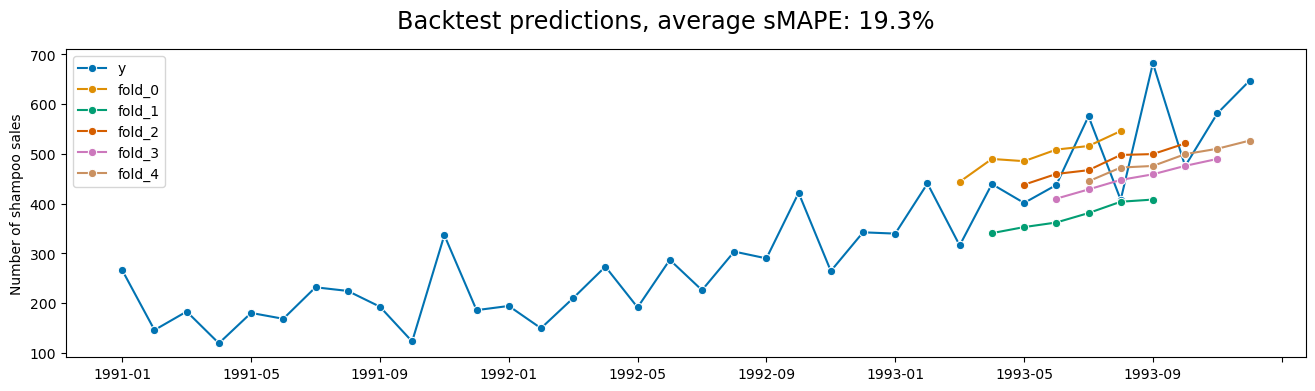

In [62]:
plot_series(
    y,
    *tuple(backtest["y_pred"][i] for i in range(n_folds)),
    labels=["y"] + [f"fold_{i}" for i in range(n_folds)],
    title=f"Backtest predictions, average sMAPE: {backtest['test_MeanAbsolutePercentageError'].mean():.1%}",
)

####  Benchmarking

In [63]:
from sktime.benchmarking.forecasting import ForecastingBenchmark

benchmark = ForecastingBenchmark()

In [64]:
from sktime.forecasting.naive import NaiveForecaster

benchmark.add_estimator(
    estimator=NaiveForecaster(strategy="mean", window_length=3), 
    estimator_id="Naive-mean-3-v1"
)
benchmark.add_estimator(
    estimator=Prophet(),
    estimator_id="Prophet-v1"
)
benchmark.add_estimator(
    estimator=AutoETS(auto=True),
    estimator_id="AutoETS-v1"
)
benchmark.add_estimator(
    estimator=forecaster_with_differencer.clone(), 
    estimator_id="LightGBM-v1"
)

cv = ExpandingWindowSplitter(initial_window=26, fh=fh, step_length=1)
scorers = [smape]

benchmark.add_task(
    load_shampoo_sales,
    cv,
    scorers,
)

In [65]:
results_df = benchmark.run(output_file="results.csv")
results_df.set_index("model_id").iloc[:, -2:].style.format("{:.1%}")

21:57:39 - cmdstanpy - INFO - Chain [1] start processing
21:57:39 - cmdstanpy - INFO - Chain [1] done processing
21:57:40 - cmdstanpy - INFO - Chain [1] start processing
21:57:40 - cmdstanpy - INFO - Chain [1] done processing
21:57:40 - cmdstanpy - INFO - Chain [1] start processing
21:57:40 - cmdstanpy - INFO - Chain [1] done processing
21:57:40 - cmdstanpy - INFO - Chain [1] start processing
21:57:41 - cmdstanpy - INFO - Chain [1] done processing
21:57:41 - cmdstanpy - INFO - Chain [1] start processing
21:57:41 - cmdstanpy - INFO - Chain [1] done processing


,MeanAbsolutePercentageError_mean,MeanAbsolutePercentageError_std
model_id,,
AutoETS-v1,14.8%,1.2%
LightGBM-v1,19.3%,3.5%
Naive-mean-3-v1,24.2%,5.1%
Prophet-v1,24.3%,4.5%


## Univariate with exogenous

Let's create some fake promotional data and see how we can include it as an exogenous variable.

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

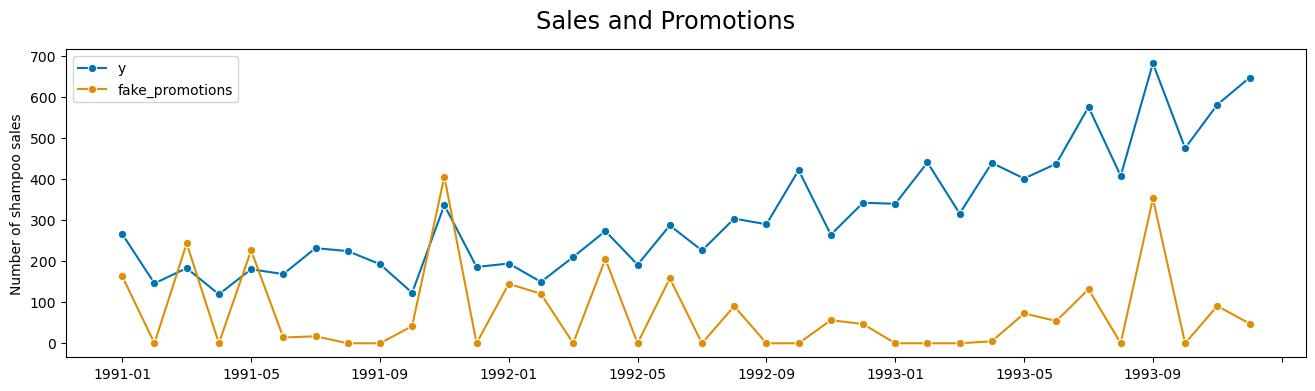

In [97]:
import numpy as np 
noise = np.random.RandomState(seed=93).normal(0, 100, np.shape(y))
promotions = (y_transform + noise).clip(lower=0)
plot_series(y, promotions, labels=["y", "fake_promotions"], title="Sales and Promotions")

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

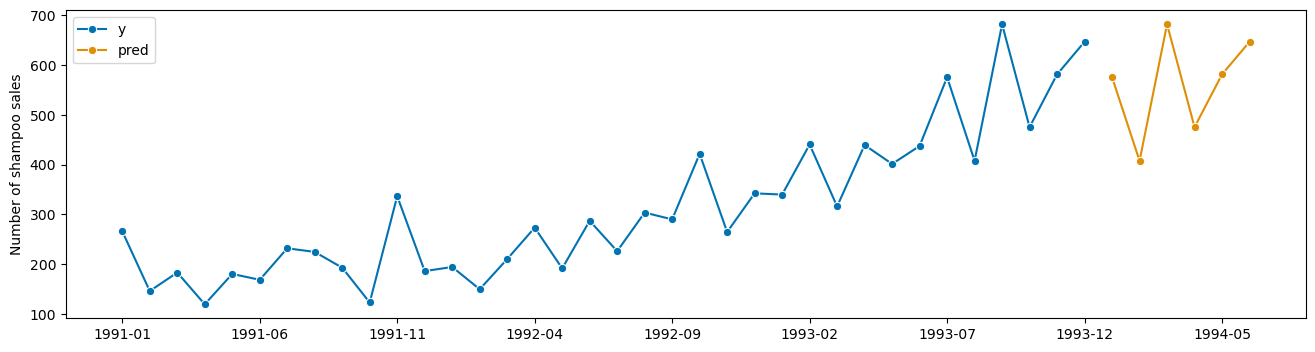

In [118]:
forecaster = NaiveForecaster(strategy="last", sp=len(fh))

forecaster.fit(y, X=promotions, fh=fh)

y_pred = forecaster.predict(X=promotions)

plot_series(y, y_pred, labels=["y", "pred"])

## Multivariate

In [202]:
from sktime.datasets import load_longley
from sktime.forecasting.var import VAR

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

y

,GNPDEFL,GNP
Period,,
1947,83.0,234289.0
1948,88.5,259426.0
1949,88.2,258054.0
1950,89.5,284599.0
1951,96.2,328975.0
1952,98.1,346999.0
1953,99.0,365385.0
1954,100.0,363112.0
1955,101.2,397469.0


In [203]:
forecaster = VAR()
forecaster.fit(y, fh=[1, 2, 3])

y_pred = forecaster.predict()
y_pred

,GNPDEFL,GNP
Period,,
1963,121.688295,578514.398653
1964,124.353664,601873.015890
1965,126.847886,625411.588754


VAR() is a purely multivariate method, but we can also use univariate forecasters to forecast multiple time series.

In [128]:
forecaster.get_class_tags()

{'scitype:y': 'multivariate',
 'ignores-exogeneous-X': True,
 'capability:insample': True,
 'capability:pred_int': True,
 'capability:pred_int:insample': False,
 'handles-missing-data': False,
 'y_inner_mtype': 'pd.DataFrame',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None,
 'python_dependencies': 'statsmodels',
 'univariate-only': False}

In [204]:
from sktime.datasets import load_longley
from sktime.forecasting.arima import ARIMA

_, y = load_longley()

y = y.drop(columns=["UNEMP", "ARMED", "POP"])

forecaster = ARIMA()
forecaster.fit(y, fh=[1, 2, 3])

forecaster.forecasters_

1,GNP,GNPDEFL
0,,
forecasters,ARIMA(),ARIMA()


In [130]:
forecaster.get_class_tags()

{'scitype:y': 'univariate',
 'ignores-exogeneous-X': False,
 'capability:insample': True,
 'capability:pred_int': True,
 'capability:pred_int:insample': True,
 'handles-missing-data': True,
 'y_inner_mtype': 'pd.Series',
 'X_inner_mtype': 'pd.DataFrame',
 'requires-fh-in-fit': False,
 'X-y-must-have-same-index': True,
 'enforce_index_type': None,
 'fit_is_empty': False,
 'python_version': None,
 'python_dependencies': 'pmdarima'}

## Probabilistic forecasting

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Number of shampoo sales'>)

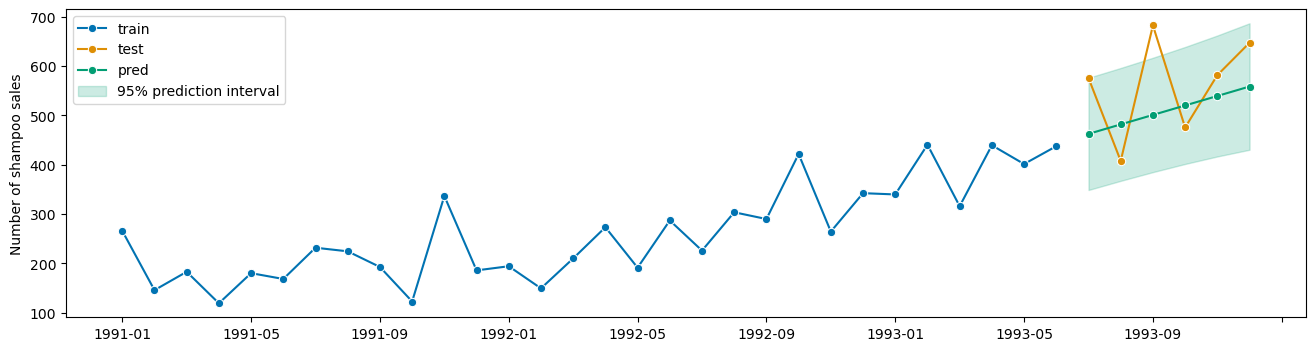

In [150]:
# 1) Define the model
forecaster = AutoETS(auto=True)

# 2) Fit on train data
forecaster.fit(y_train)

# 3) Use fitted model to predict for a certain forecast horizon (fh)
fh = [1, 2, 3, 4, 5, 6]
y_pred = forecaster.predict(fh)

# 4) Call a probabilistic method after or in place of step 3
y_pred_int = forecaster.predict_interval(coverage=0.95)

plot_series(y_train, y_test, y_pred, labels=["train", "test", "pred"], pred_interval=y_pred_int)

The following methods are possibly available for probabilistic forecasts:

- `predict_interval` produces interval forecasts. Additionally to any `predict` arguments, an argument `coverage` (nominal interval coverage) must be provided.
- `predict_quantiles` produces quantile forecasts. Additionally to any `predict` arguments, an argument `alpha` (quantile values) must be provided.
- `predict_var` produces variance forecasts. This has same arguments as `predict`.
- `predict_proba` produces full distributional forecasts. This has same arguments as `predict`.

| Name | param | prediction/estimate of | `sktime` |
| ---- | ----- | ---------------------- | -------- |
| point forecast | | conditional expectation $\mathbb{E}[y'\|y]$ | `predict` |
| variance forecast | | conditional variance $Var[y'\|y]$ | `predict_var` |
| quantile forecast | $\alpha\in (0,1)$ | $\alpha$-quantile of $y'\|y$ | `predict_quantiles` |
| interval forecast | $c\in (0,1)$| $[a,b]$ s.t. $P(a\le y' \le b\| y) = c$ | `predict_interval` |
| distribution forecast | | the law/distribution of $y'\|y$ | `predict_proba` |

In [155]:
from sktime.registry import all_estimators

all_estimators(
    "forecaster", filter_tags={"capability:pred_int": True}, as_dataframe=True
)

,name,estimator
0,ARIMA,<class 'sktime.forecasting.arima.ARIMA'>
1,AutoARIMA,<class 'sktime.forecasting.arima.AutoARIMA'>
2,AutoETS,<class 'sktime.forecasting.ets.AutoETS'>
3,BATS,<class 'sktime.forecasting.bats.BATS'>
4,BaggingForecaster,<class 'sktime.forecasting.compose._bagging.Ba...
5,ColumnEnsembleForecaster,<class 'sktime.forecasting.compose._column_ens...
6,ConformalIntervals,<class 'sktime.forecasting.conformal.Conformal...
7,DynamicFactor,<class 'sktime.forecasting.dynamic_factor.Dyna...
8,ForecastX,<class 'sktime.forecasting.compose._pipeline.F...
9,ForecastingGridSearchCV,<class 'sktime.forecasting.model_selection._tu...


In [151]:
forecaster.predict_interval(coverage=0.95)

Coverage            
               0.95            
              lower       upper
1993-07  348.725151  575.969670
1993-08  367.230971  595.837225
1993-09  384.900391  616.541181
1993-10  401.437727  638.377220
1993-11  416.599503  661.588820
1993-12  430.212386  686.349311

In [152]:
forecaster.predict_quantiles(alpha=[0.275, 0.95])

Quantiles            
              0.275       0.950
1993-07  427.694296  557.702217
1993-08  446.673329  577.460307
1993-09  465.397273  597.920326
1993-10  483.775947  619.330419
1993-11  501.735096  641.894919
1993-12  519.221855  665.759291

In [153]:
forecaster.predict_var()

,0
1993-07,3360.707082
1993-08,3401.105014
1993-09,3491.997328
1993-10,3653.580973
1993-11,3906.052892
1993-12,4269.610032


To predict full predictive distributions, `predict_proba` can be used. As this returns tensorflow `Distribution` objects, the deep learning dependency set `dl` of sktime (which includes `tensorflow` and `tensorflow-probability` dependencies) must be installed.

In [154]:
forecaster.predict_proba()

Normal(columns=Index(['Number of shampoo sales'], dtype='object'),
       index=PeriodIndex(['1993-07', '1993-08', '1993-09', '1993-10', '1993-11', '1993-12'], dtype='period[M]'),
       mu=         Number of shampoo sales
1993-07               462.347411
1993-08               481.534098
1993-09               500.720786
1993-10               519.907474
1993-11               539.094161
1993-12               558.280849,
       sigma=                 0
1993-07  57.971606
1993-08  58.318994
1993-09  59.093124
1993-10  60.444859
1993-11  62.498423
1993-12  65.342253)

## Hierarchical forecasting